In [2]:
import numpy as np
df = np.genfromtxt('data.csv', delimiter=',')

Text(0.5, 1.0, 'Training Set Table')

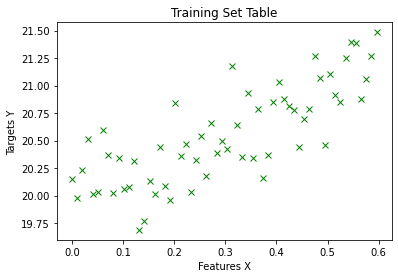

In [3]:
import matplotlib.pyplot as plt
plt.plot(df[:,0], df[:,1], 'gx')
plt.xlabel("Features X")
plt.ylabel("Targets Y")
plt.title("Training Set Table")

In [4]:
x_var = np.zeros(df.shape)
x_var[:,0] = np.ones(df.shape[0])
x_var[:,1] = df[:,0]
y_tar = df[:, 1]

In [5]:
def hypothesis(x_input, beta):
    return x_input @ beta

In [6]:
def cost_function(x_input, y_tar, beta):
    m = x_input.shape[0]
    return ((hypothesis(x_input, beta) - y_tar).T @ (hypothesis(x_input, beta) - y_tar)) / (2*m)

In [7]:
def gradient_descent(a, beta, x_input, y_tar):
    m = x_input.shape[0] #60
    prev_beta = np.copy(beta)
    np.subtract(beta, (a/m) * (x_input.T @ (hypothesis(x_input, beta) - y_tar)), out=beta)
    eps = 0.0000001
    itr = 1
    print(f'Epoch = 0, beta = {beta}, cost_function = {cost_function(x_input, y_tar, beta)}')
    while np.max(np.absolute(beta - prev_beta)) > eps:
        prev_beta = np.copy(beta)
        np.subtract(beta, (a/m) * (x_input.T @ (hypothesis(x_input, beta) - y_tar)), out=beta)
        itr += 1
    print(f'Epoch = {itr}, theta = {beta}, cost_function = {cost_function(x_input, y_tar, beta)}')
    return beta

In [8]:
#Model selection
incr = 1
trial_alpha = np.array([0.01, 0.03, 0.09, 0.27])
for try_a in trial_alpha :
    calc_costs = np.zeros(4)
    for i in range(0,60,15):
        cv_x = x_var[i:i+15, :]
        cv_y = y_tar[i:i+15]
        train_x = np.concatenate((x_var[0:i,:], x_var[i+15:, :])) if i+15 < 60 else x_var[0:i,:]
        train_y = np.concatenate((y_tar[0:i], y_tar[i+15:])) if i+15 < 60 else y_tar[0:i]
        beta = gradient_descent(try_a, np.array([0.,0.]), train_x, train_y)
        calc_costs[i//15] = cost_function(cv_x, cv_y, beta)
        min_cf = min(calc_costs)
        max_cf = max(calc_costs)
    print('\n'f'cost_func for alpha({incr}) = {calc_costs}')
    print(f'min value in cost_func = {min_cf}')
    print(f'max value in cost_func = {max_cf}''\n')
incr += 1

Epoch = 0, beta = [0.20684578 0.07771669], cost_function = 209.15329014737134
Epoch = 58500, theta = [19.79241162  2.38713778], cost_function = 0.03303267115075177
Epoch = 0, beta = [0.20623267 0.06737922], cost_function = 208.08601642446442
Epoch = 28247, theta = [20.00604519  1.90951963], cost_function = 0.038996404434440746
Epoch = 0, beta = [0.20510836 0.05670335], cost_function = 205.95472904327823
Epoch = 26810, theta = [19.95630754  2.03326082], cost_function = 0.033884154541092074
Epoch = 0, beta = [0.20379572 0.045557  ], cost_function = 203.38302997676288
Epoch = 51490, theta = [20.03198703  1.5641208 ], cost_function = 0.0364392009486711

cost_func for alpha(1) = [0.06137883 0.03067304 0.04491757 0.05258031]
min value in cost_func = 0.03067303565517914
max value in cost_func = 0.0613788320942307

Epoch = 0, beta = [0.62053734 0.23315007], cost_function = 199.6112728014475
Epoch = 21927, theta = [19.79257946  2.38669547], cost_function = 0.033032667778422016
Epoch = 0, beta =

In [9]:
second_a = 0.01
test_df = np.genfromtxt('test_data.csv', delimiter=',')
var_x = np.zeros(test_df.shape)
var_x[:, 0] = np.ones(test_df.shape[0])
var_x[:, 1] = test_df[:, 0]
tar_y = test_df[:,1]

beta = gradient_descent(second_a, np.array([0.,0.]), x_var, y_tar)
print(f'Cost function on training set = {cost_function(x_var, y_tar, beta)}')
print(f'Cost function on test set = {cost_function(var_x, tar_y, beta)}')

Epoch = 0, beta = [0.20549563 0.06183907], cost_function = 206.65857757979356
Epoch = 33057, theta = [19.95981596  1.97914144], cost_function = 0.03651753585780881
Cost function on training set = 0.03651753585780881
Cost function on test set = 0.037785463123475284


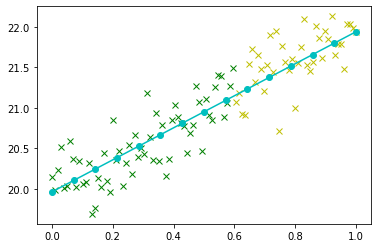

In [10]:
plt.clf()
plt.plot(df[:,0], df[:,1], 'gx')
plt.plot(test_df[:,0], test_df[:,1], 'yx')
points = np.linspace(0,1,15)
line = np.array([hypothesis([1,i],beta) for i in points])
plt.plot(points, line, 'co-')